In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("PlacementData_new.csv")
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1.0,1.0,1.0,65.0,4.4,No,No,61.0,79.0,NotPlaced
1,8.9,0.0,3.0,2.0,90.0,4.0,Yes,Yes,78.0,82.0,Placed
2,7.3,1.0,2.0,2.0,82.0,4.8,Yes,No,79.0,80.0,NotPlaced
3,7.5,1.0,1.0,2.0,85.0,4.4,Yes,Yes,81.0,80.0,Placed
4,8.3,1.0,2.0,2.0,86.0,4.5,Yes,Yes,74.0,88.0,Placed


In [4]:
df.columns

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities',
       'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [5]:
df.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [6]:
encoder = OneHotEncoder(drop="first")
df['ExtracurricularActivities'] = encoder.fit_transform(df[['ExtracurricularActivities']]).toarray()
df['PlacementTraining'] = encoder.fit_transform(df[['PlacementTraining']]).toarray()

In [7]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1.0,1.0,1.0,65.0,4.4,0.0,0.0,61.0,79.0,NotPlaced
1,8.9,0.0,3.0,2.0,90.0,4.0,1.0,1.0,78.0,82.0,Placed
2,7.3,1.0,2.0,2.0,82.0,4.8,1.0,0.0,79.0,80.0,NotPlaced
3,7.5,1.0,1.0,2.0,85.0,4.4,1.0,1.0,81.0,80.0,Placed
4,8.3,1.0,2.0,2.0,86.0,4.5,1.0,1.0,74.0,88.0,Placed


In [8]:
X = df.iloc[:, :-1]
y = df["PlacementStatus"]

In [9]:
X

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1.0,1.0,1.0,65.0,4.4,0.0,0.0,61.0,79.0
1,8.9,0.0,3.0,2.0,90.0,4.0,1.0,1.0,78.0,82.0
2,7.3,1.0,2.0,2.0,82.0,4.8,1.0,0.0,79.0,80.0
3,7.5,1.0,1.0,2.0,85.0,4.4,1.0,1.0,81.0,80.0
4,8.3,1.0,2.0,2.0,86.0,4.5,1.0,1.0,74.0,88.0
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1.0,1.0,2.0,72.0,3.9,1.0,0.0,85.0,66.0
9996,7.4,0.0,1.0,0.0,90.0,4.8,0.0,0.0,84.0,67.0
9997,8.4,1.0,3.0,0.0,70.0,4.8,1.0,1.0,79.0,81.0
9998,8.9,0.0,3.0,2.0,87.0,4.8,1.0,1.0,71.0,85.0


In [10]:
y

0       NotPlaced
1          Placed
2       NotPlaced
3          Placed
4          Placed
          ...    
9995    NotPlaced
9996       Placed
9997       Placed
9998       Placed
9999    NotPlaced
Name: PlacementStatus, Length: 10000, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr

LogisticRegression()

In [14]:
lr.fit(x_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
lr.score(x_test, y_test)

0.8006666666666666

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes= (10, ),
    solver = 'adam',
    activation= 'logistic',
    learning_rate_init= 0.1,
    max_iter= 10,
    random_state=42
)

mlp.fit(x_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
              learning_rate_init=0.1, max_iter=10, random_state=42)

In [26]:
y_pred_mlp = mlp.predict(x_test)

y_pred_mlp

array(['NotPlaced', 'NotPlaced', 'NotPlaced', ..., 'NotPlaced',
       'NotPlaced', 'NotPlaced'], dtype='<U9')

In [27]:
y_pred = rf.predict(x_test)
y_pred

array(['NotPlaced', 'NotPlaced', 'Placed', ..., 'NotPlaced', 'Placed',
       'NotPlaced'], dtype=object)

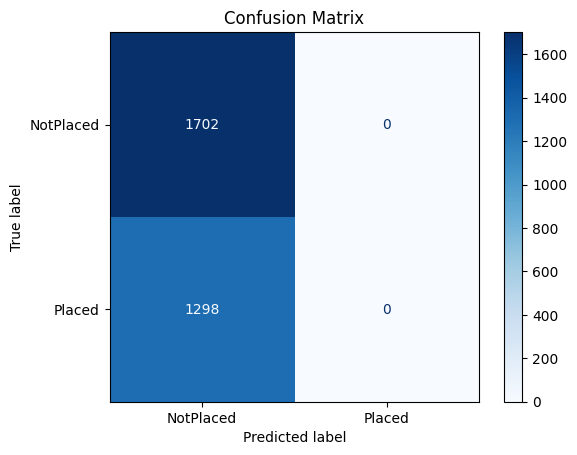

In [28]:
from sklearn.metrics import *

cm = confusion_matrix(y_test, y_pred_mlp)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()